In [1]:
# What type of social media platform are you most likely to use? 

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('Updated_Social_Media_Usage_Data.csv')

In [4]:
df

,age,income,gender,time_spent,preferred_platform,interests,demographics,posts_per_week,exercise_hours
0,51,94413,female,4.5,Facebook,Sports,Suburban,7,5.5
1,64,87851,female,1.0,Facebook,Technology,Urban,14,8.0
2,41,68087,female,4.5,Instagram,Food,Rural,1,10.0
3,27,30988,male,5.0,Instagram,Music,Urban,3,7.0
4,55,79214,non-binary,1.0,Instagram,Sports,Rural,11,4.5
...,...,...,...,...,...,...,...,...,...
1995,32,45309,male,5.0,TikTok,Food,Suburban,3,9.5
1996,34,33802,male,1.0,Facebook,Technology,Urban,6,5.0
1997,23,27369,male,3.5,Snapchat,Music,Suburban,6,2.0
1998,39,61083,female,2.5,Snapchat,Technology,Suburban,11,0.0


In [5]:
df['demographics'].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [6]:
# Wrangling Dataset 
# Changing Columns from string data to numerical data 

gender_mapping = {'male': 0, 'female': 1, 'non-binary': 2}
df['gender'] = df['gender'].replace(gender_mapping)

platform_mapping = {'Facebook': 0, 'Instagram': 1, 'Twitter': 2, 'Snapchat': 3, 'TikTok': 4}
df['preferred_platform'] = df['preferred_platform'].replace(platform_mapping)

interests_mapping = {'Sports': 0, 'Technology': 1, 'Food': 2, 'Music': 3, 'Art': 4, 'Fashion': 5, 'Travel': 6}
df['interests'] = df['interests'].replace(interests_mapping)

demographics_mapping = {'Suburban': 0, 'Urban': 1, 'Rural': 2}
df['demographics'] = df['demographics'].replace(demographics_mapping)

In [7]:
df

,age,income,gender,time_spent,preferred_platform,interests,demographics,posts_per_week,exercise_hours
0,51,94413,1,4.5,0,0,0,7,5.5
1,64,87851,1,1.0,0,1,1,14,8.0
2,41,68087,1,4.5,1,2,2,1,10.0
3,27,30988,0,5.0,1,3,1,3,7.0
4,55,79214,2,1.0,1,0,2,11,4.5
...,...,...,...,...,...,...,...,...,...
1995,32,45309,0,5.0,4,2,0,3,9.5
1996,34,33802,0,1.0,0,1,1,6,5.0
1997,23,27369,0,3.5,3,3,0,6,2.0
1998,39,61083,1,2.5,3,1,0,11,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 2000 non-null   int64  
 1   income              2000 non-null   int64  
 2   gender              2000 non-null   int64  
 3   time_spent          2000 non-null   float64
 4   preferred_platform  2000 non-null   int64  
 5   interests           2000 non-null   int64  
 6   demographics        2000 non-null   int64  
 7   posts_per_week      2000 non-null   int64  
 8   exercise_hours      2000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [37]:
df_2 = pd.read_csv('social_media_usage_with_gender.csv')

In [38]:
df_2

,Age,Profession,Average_Time_Spent,Preferred_Platform,Country,Gender
0,31,Artist,4.08,Twitter,Australia,Female
1,61,Artist,3.05,Twitter,France,Female
2,43,HR Specialist,2.22,TikTok,South Korea,Male
3,60,Teacher,4.36,Twitter,Canada,Female
4,15,Accountant,3.59,Facebook,Canada,Male
...,...,...,...,...,...,...
1495,42,Software Engineer,3.52,Snapchat,Australia,Male
1496,43,Software Engineer,1.44,Instagram,USA,Male
1497,20,HR Specialist,2.67,Instagram,Australia,Female
1498,66,Doctor,1.42,Snapchat,UK,Female


In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Profession          1500 non-null   object 
 2   Average_Time_Spent  1500 non-null   float64
 3   Preferred_Platform  1500 non-null   object 
 4   Country             1500 non-null   object 
 5   Gender              1500 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 70.4+ KB


In [58]:
df_2['Gender'].unique()

array([1, 0, 2, 'Other'], dtype=object)

In [59]:
#MAPPING 

gender_mapping = {'Male': 0, 'Female': 1, 'Non-binary': 2, 'Other': 3}
df_2['Gender'] = df_2['Gender'].replace(gender_mapping)

platform_mapping = {'Twitter': 0, 'TikTok': 1, 'Facebook': 2, 'YouTube': 3, 'LinkedIn': 4, 'Instagram': 5, 'Snapchat': 6, 'Reddit': 7}
df_2['Preferred_Platform'] = df_2['Preferred_Platform'].replace(platform_mapping)

profession_mapping = {
    'Artist': 0,
    'HR Specialist': 1,
    'Teacher': 2,
    'Accountant': 3,
    'Lawyer': 4,
    'Writer': 5,
    'Engineer': 6,
    'Data Scientist': 7,
    'Doctor': 8,
    'Marketing Specialist': 9,
    'Photographer': 10,
    'Mechanic': 11,
    'Administrative Assistant': 12,
    'Student': 13,
    'Consultant': 14,
    'Technician': 15,
    'Software Engineer': 16,
    'Graphic Designer': 17,
    'Musician': 18,
    'Chef': 19,
    'Retail Worker': 20,
    'Nurse': 21,
    'Freelancer': 22,
    'Salesperson': 23
}

df_2['Profession'] = df_2['Profession'].replace(profession_mapping)

country_mapping = {
    'Australia': 0,
    'France': 1,
    'South Korea': 2,
    'Canada': 3,
    'Brazil': 4,
    'Germany': 5,
    'USA': 6,
    'UK': 7,
    'Japan': 8,
    'India': 9
}
df_2['Country'] = df_2['Country'].replace(country_mapping)

In [60]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Profession          1500 non-null   int64  
 2   Average_Time_Spent  1500 non-null   float64
 3   Preferred_Platform  1500 non-null   int64  
 4   Country             1500 non-null   int64  
 5   Gender              1500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 70.4 KB


In [61]:
#CLUSTERING K MEANS AGAIN 


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [62]:
scaler = StandardScaler()
scaled_df_2 = pd.DataFrame(scaler.fit_transform(df_2))

In [64]:
scaled_df_2

,0,1,2,3,4,5
0,-0.584147,-1.629131,0.955881,-1.559025,-1.579866,0.730218
1,1.229097,-1.629131,0.171444,-1.559025,-1.230904,0.730218
2,0.141151,-1.486007,-0.460675,-1.116455,-0.881942,-0.878192
3,1.168656,-1.342883,1.169126,-1.559025,-0.532981,0.730218
4,-1.551210,-1.199759,0.582702,-0.673886,-0.532981,-0.878192
...,...,...,...,...,...,...
1495,0.080709,0.660850,0.529391,1.096392,-1.579866,-0.878192
1496,0.141151,0.660850,-1.054715,0.653823,0.513904,-0.878192
1497,-1.249003,-1.486007,-0.117960,0.653823,-1.579866,0.730218
1498,1.531304,-0.484140,-1.069947,1.096392,0.862866,0.730218


In [65]:
kmeans = KMeans(n_clusters=2)

In [67]:
kmeans.fit(scaled_df_2)

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [68]:
kmeans.inertia_

7838.823645510125

In [69]:
inertias = []
for cluster in range(2,100): 
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_df_2)
    inertias.append(kmeans.inertia_)

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [71]:
frame = pd.DataFrame({"Clusters":  range(2,100), "Inertias": inertias})

In [72]:
frame

,Clusters,Inertias
0,2,7838.823646
1,3,7108.631773
2,4,6524.155406
3,5,6056.904317
4,6,5678.355534
...,...,...
93,95,1521.636804
94,96,1502.308988
95,97,1500.037962
96,98,1489.893345


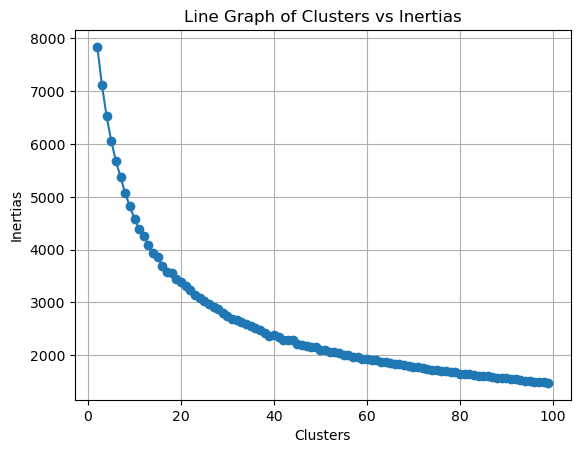

In [73]:
import matplotlib.pyplot as plt

# Plot the line graph
plt.plot(frame['Clusters'], frame['Inertias'], marker='o')
plt.title('Line Graph of Clusters vs Inertias')
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.grid(True)
plt.show()

In [75]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(scaled_df_2)
cluster_labels = kmeans.fit_predict(scaled_df_2)

# Calculate the Silhouette score
sil_score = silhouette_score(scaled_df_2, cluster_labels)
sil_score

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.15903645163682664

In [76]:
sils = []
for cluster in range(2,100): 
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_df_2)
    cluster_labels = kmeans.fit_predict(scaled_df_2)
    sil_score = silhouette_score(scaled_df_2, cluster_labels)
    sils.append(sil_score)

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [77]:
frame2 = pd.DataFrame({"Clusters":  range(2,100), "sils": sils})

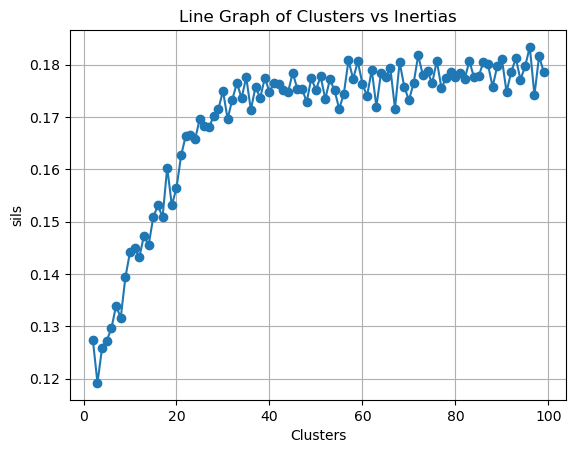

In [78]:
# Plot the line graph
plt.plot(frame2['Clusters'], frame2['sils'], marker='o')
plt.title('Line Graph of Clusters vs Inertias')
plt.xlabel('Clusters')
plt.ylabel('sils')
plt.grid(True)
plt.show()